In [13]:
import time
from datetime import datetime

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
dates = pd.date_range('2017-10-10', '2017-10-14')

In [42]:
data_chunks = []

for d in dates:
    chunk = pd.read_csv('../data/google/results_' + d.strftime('%Y-%m-%d') + '.csv',
                       names = ['LogTime', 'LinkRef', 'Distance', 'Duration'])
    data_chunks.append(chunk)
    

data = pd.concat(data_chunks)
data['LogTime'] = pd.to_datetime(data['LogTime'])

In [43]:
tss_gmaps = {}

for link_ref, measures in data.groupby('LinkRef'):
    measures = measures.set_index('LogTime')
    tss_gmaps[link_ref] = measures.resample('15min')['Duration'].mean() 

ts_gmaps = pd.DataFrame(tss_gmaps)

In [44]:
ts_wo_missing = ts_gmaps.interpolate().fillna(method = 'pad').fillna(method='bfill')

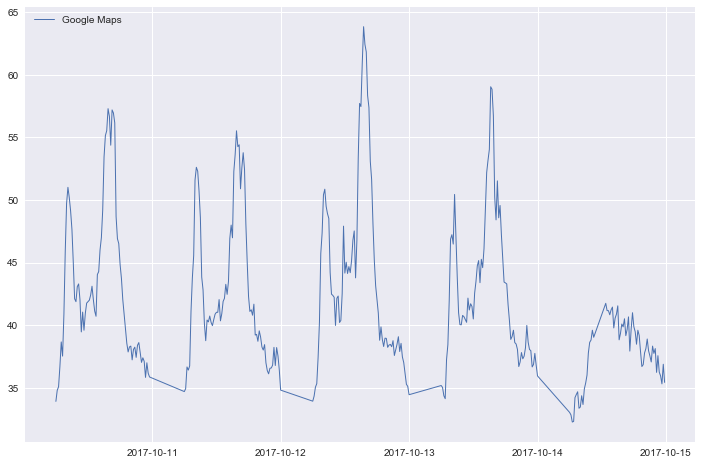

In [46]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(ts_wo_missing.sum(axis = 1) / 60, label = 'Google Maps', linewidth = 1)
ax.legend(loc='upper left')

In [47]:
ts_wo_missing.to_csv('../data/google/data_prepared.csv')